In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [3]:
def train_preprocess():
    df_train = pd.read_csv('Datasets/UNSW_NB15_training-set.csv')
    df_train.drop_duplicates(keep='first',inplace=True)
    
    for col in ['proto','service','state']:
        df_train[col] = df_train[col].astype('category')
    
    label1 = 'other_proto'
    others2 = df_train['proto'].value_counts().index[7:]
    df_train['proto'] = df_train['proto'].cat.add_categories([label1])
    df_train['proto'] = df_train['proto'].replace(others2, label1)
    
    label2 = 'other_state'
    others3 = df_train['state'].value_counts().index[4:]
    df_train['state'] = df_train['state'].cat.add_categories([label2])
    df_train['state'] = df_train['state'].replace(others3, label2)
    
    df_train.drop_duplicates(keep='first',inplace=True)
    
    return df_train
df_train = train_preprocess()

In [4]:
def test_preprocess():
    df_test = pd.read_csv('Datasets/UNSW_NB15_testing-set.csv')
    df_test.drop(df_test[df_test['state'] == 'ACC'].index, inplace = True)
    df_test.drop(df_test[df_test['state'] == 'CLO'].index, inplace = True)
    
    for col in ['proto','service','state']:
        df_test[col] = df_test[col].astype('category')
    
    label1 = 'other_proto'
    others4 = df_test['proto'].value_counts().index[7:]
    df_test['proto'] = df_test['proto'].cat.add_categories([label1])
    df_test['proto'] = df_test['proto'].replace(others4, label1)
    
    label2 = 'other_state'
    others5 = df_test['state'].value_counts().index[4:]
    df_test['state'] = df_test['state'].cat.add_categories([label2])
    df_test['state'] = df_test['state'].replace(others5, label2)
    
    df_test.drop_duplicates(keep='first',inplace=True)
    
    return df_test
df_test = test_preprocess()

In [5]:
df_test['label'].unique()

array([0, 1], dtype=int64)

In [6]:
limit1 = df_train.shape[1]-1
    
X_train = df_train.iloc[:,0:limit1] # train set features
Y_train = df_train.iloc[:,limit1]

limit2 = df_test.shape[1]-1
    
X_test = df_test.iloc[:,0:limit2] # train set features
Y_test = df_test.iloc[:,limit2]

In [7]:
def one_hot_encode(X_train,X_test):
    
    categorical_cols = ['proto','service','state']

    # Training dataset one hot encoding
    ohe = OneHotEncoder(handle_unknown = 'ignore')
    ohe.fit(X_train[categorical_cols])
    array_hot_encoded1 = ohe.transform(X_train[categorical_cols]).toarray()
    data_hot_encoded1 = pd.DataFrame(array_hot_encoded1, index=X_train.index)
    X_train = X_train.drop(columns=categorical_cols)
    X_train = pd.concat([data_hot_encoded1,X_train], axis=1)
    
    print('X_train shape :',X_train.shape)
    
    # Test dataset one hot encoding
    array_hot_encoded2 = ohe.transform(X_test[categorical_cols]).toarray()
    data_hot_encoded2 = pd.DataFrame(array_hot_encoded2, index=X_test.index)
    X_test = X_test.drop(columns=categorical_cols)
    X_test = pd.concat([data_hot_encoded2,X_test], axis=1)
    
    print('X_test shape :',X_test.shape)
    
    return X_train, X_test

X_train, X_test = one_hot_encode(X_train,X_test)

X_train shape : (101046, 65)
X_test shape : (53901, 65)


In [8]:
df_test['label'].unique()

array([0, 1], dtype=int64)

In [9]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Y_train.reset_index(drop=True,inplace=True)
Y_test.reset_index(drop=True,inplace=True)

In [10]:
Y_test.unique()

array([0, 1], dtype=int64)

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(101046, 65)
(101046,)
(53901, 65)
(53901,)


In [12]:
Y_test.unique()

array([0, 1], dtype=int64)

In [13]:
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)

In [14]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,2,0,0,0,1,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,2,0,0,0,1,2,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,3,0,0,0,1,3,0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2,2,1,3,0,0,0,2,3,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,1,4,0,0,0,1,4,0
53897,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,1,0,0,0,1,1,0
53898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,1,1,0,0,0,1,3,0
53899,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2,1,1,2,0,0,0,2,1,0


In [15]:
Y_test

0        0
1        0
2        0
3        0
4        0
        ..
53896    0
53897    0
53898    0
53899    0
53900    0
Name: label, Length: 53901, dtype: int64

In [16]:
df_train = pd.concat([X_train,Y_train],axis=1)
df_test = pd.concat([X_test,Y_test],axis=1)

In [17]:
df_test['label'].unique()

array([0, 1], dtype=int64)

In [18]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,1,0,0,0,1,1,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,2,0,0,0,1,6,0,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,1,3,0,0,0,2,6,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,3,1,1,0,2,1,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,1,40,0,0,0,2,39,0,0


In [19]:
corr = df_train.corr()

In [20]:
corr

,0,1,2,3,4,5,6,7,8,9,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1.000000,-0.001060,-0.000588,-0.000996,-0.000331,-0.023325,-0.007243,-0.000916,0.011396,-0.000259,...,0.000567,0.004560,0.004542,-0.001797,-0.001797,-0.004328,-0.002329,0.000931,-0.000983,0.013714
1,-0.001060,1.000000,-0.003500,-0.005927,-0.001967,-0.138745,-0.043082,-0.005451,0.067786,-0.001540,...,-0.010819,0.004637,-0.027762,-0.010688,-0.010688,-0.025747,-0.037772,-0.036608,0.924058,-0.077278
2,-0.000588,-0.003500,1.000000,-0.003291,-0.001092,-0.077037,-0.023921,-0.003027,0.037638,-0.000855,...,-0.011284,-0.000330,-0.013116,-0.005934,-0.005934,-0.014296,-0.012589,-0.022825,-0.003246,0.017844
3,-0.000996,-0.005927,-0.003291,1.000000,-0.001850,-0.130453,-0.040507,-0.005125,0.063735,-0.001448,...,0.008830,0.033555,0.023632,-0.010049,-0.010049,-0.024208,0.017793,0.006204,-0.005497,0.068432
4,-0.000331,-0.001967,-0.001092,-0.001850,1.000000,-0.043299,-0.013445,-0.001701,0.021155,-0.000481,...,-0.005804,-0.002658,-0.008890,-0.003335,-0.003335,-0.008035,-0.003277,-0.012789,-0.001825,0.025458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ct_flw_http_mthd,-0.004328,-0.025747,-0.014296,-0.024208,-0.008035,0.185571,-0.175960,-0.022262,-0.357900,-0.006290,...,-0.057007,-0.029259,-0.090564,-0.043652,-0.043652,1.000000,-0.046927,-0.146404,-0.023880,0.141741
ct_src_ltm,-0.002329,-0.037772,-0.012589,0.017793,-0.003277,-0.211305,0.217619,0.032074,-0.057003,-0.005339,...,0.648649,0.521436,0.511268,0.002945,0.002945,-0.046927,1.000000,0.482853,-0.034012,-0.026415
ct_srv_dst,0.000931,-0.036608,-0.022825,0.006204,-0.012789,-0.327531,0.344697,0.006375,0.140133,-0.009529,...,0.720566,0.582842,0.882978,-0.075800,-0.075800,-0.146404,0.482853,1.000000,-0.032427,-0.096946
is_sm_ips_ports,-0.000983,0.924058,-0.003246,-0.005497,-0.001825,-0.128057,-0.039958,-0.005055,0.062871,-0.001428,...,-0.008390,0.007050,-0.024355,-0.009913,-0.009913,-0.023880,-0.034012,-0.032427,1.000000,-0.071674


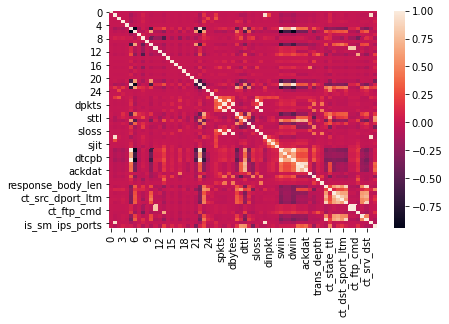

In [21]:
sns.heatmap(corr)

In [22]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.8 or corr.iloc[i,j] <= -0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df_train.columns[columns]
df_train = df_train[selected_columns]

In [23]:
cols = list(df_train.columns)

In [24]:
df_train['label'].unique()

array([0, 1], dtype=int64)

In [25]:
df_test['label'].unique()

array([0, 1], dtype=int64)

In [26]:
df_test = df_test[cols]

In [27]:
df_test.columns

Index([                  0,                   1,                   2,
                         3,                   4,                   5,
                         7,                   8,                   9,
                        10,                  11,                  12,
                        13,                  14,                  15,
                        16,                  17,                  18,
                        19,                  20,                  21,
                        23,                  24,                  25,
                     'dur',             'spkts',             'dpkts',
                    'rate',              'sttl',              'dttl',
                   'sload',             'dload',            'dinpkt',
                    'sjit',              'djit',             'stcpb',
                   'dtcpb',            'tcprtt',             'smean',
                   'dmean',       'trans_depth', 'response_body_len',
              'ct_sr

In [28]:
df_test.dropna()

,0,1,2,3,4,5,7,8,9,10,...,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_flw_http_mthd,ct_src_ltm,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,2,2,1,1,0,1,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,2,2,1,1,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,3,2,1,1,0,1,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,3,2,2,2,0,2,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,3,2,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53896,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,45,0,0,4,1,1,1,0,1,0
53897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,2,1,1,0,1,0
53898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,43,0,0,1,1,1,1,0,1,0
53899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,2,2,1,0,2,0


In [29]:
df_test.shape

(53901, 49)

In [30]:
df_test['label'].unique()

array([0, 1], dtype=int64)

In [31]:
df_test['label'] = df_test['label'].astype(int)

In [32]:
df_test.groupby('label')['label'].count()

label
0    34204
1    19697
Name: label, dtype: int64

In [33]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [34]:
df_test.shape

(53901, 49)

In [35]:
print('Train set duplicates: ',df_train.duplicated().sum())
print('Test set duplicates: ',df_test.duplicated().sum())

Train set duplicates:  1964
Test set duplicates:  1293


In [36]:
df_train.drop_duplicates(keep='first',inplace=True)
df_test.drop_duplicates(keep='first',inplace=True)

In [37]:
# Class count
count_class_0, count_class_1 = df_train['label'].value_counts()

# Divide by class
df_class_0 = df_train[df_train['label'] == 0]
df_class_1 = df_train[df_train['label'] == 1]
    
df_class_0_under = df_class_0.sample(count_class_1)
df_train = pd.concat([df_class_0_under, df_class_1], axis=0)

In [38]:
df_train.reset_index(drop=True,inplace=True)
df_test.reset_index(drop=True,inplace=True)

In [39]:
df_train.groupby('label')['label'].count()

label
0    47839
1    47839
Name: label, dtype: int64

In [40]:
df_train.to_csv('USNW_train1.csv')
df_test.to_csv('USNW_test1.csv')

In [41]:
df_train

,0,1,2,3,4,5,7,8,9,10,...,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_flw_http_mthd,ct_src_ltm,label
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,230,0,0,3,0,6,1,0,2,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,76,0,0,8,0,4,1,0,1,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,82,1,83,3,0,4,1,1,9,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1276,0,0,16,0,7,1,0,7,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,91,0,0,7,0,7,6,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95673,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,71,0,0,1,1,1,1,0,18,1
95674,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1254,0,0,1,1,1,1,0,2,1
95675,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,556,0,0,1,1,1,1,0,7,1
95676,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,89,0,0,1,1,2,1,0,2,1
